# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('dummy.csv')
df.columns

Index(['possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'mau', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co-op apartment', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [7]:
y = df['mau']
X = df.drop('mau', axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_train, y_train)

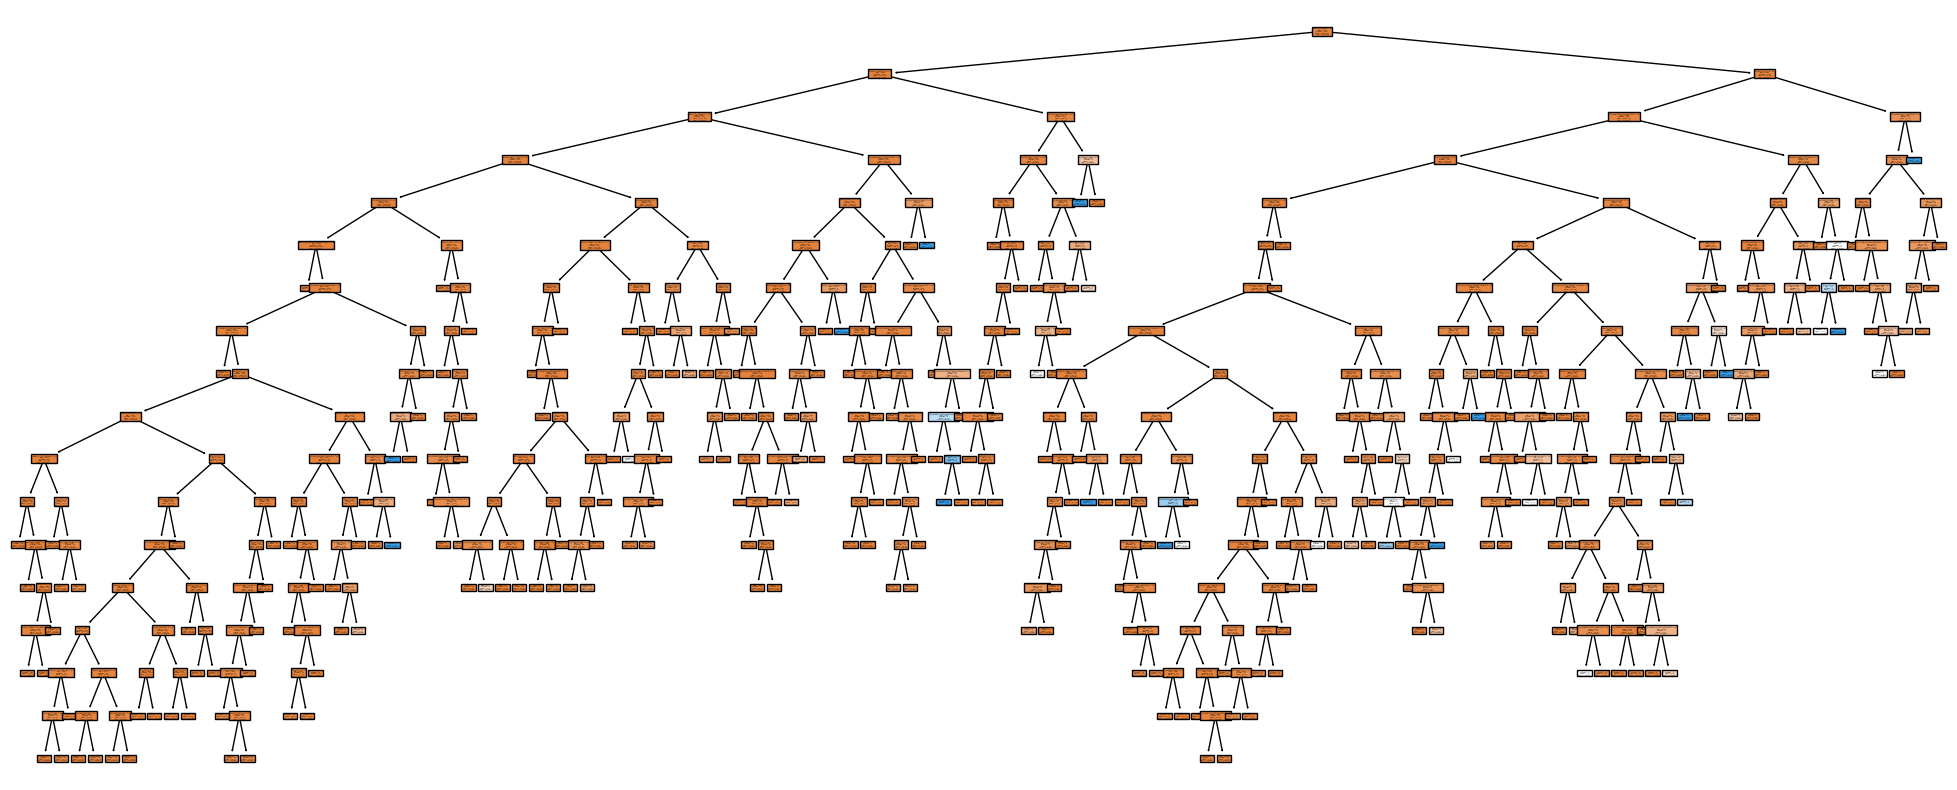

In [10]:
plt.figure(figsize = (25, 10))
plot_tree(clf,
         filled = True,
         class_names = ['Aprovados', 'Reprovados'],
         feature_names = X_train.columns);

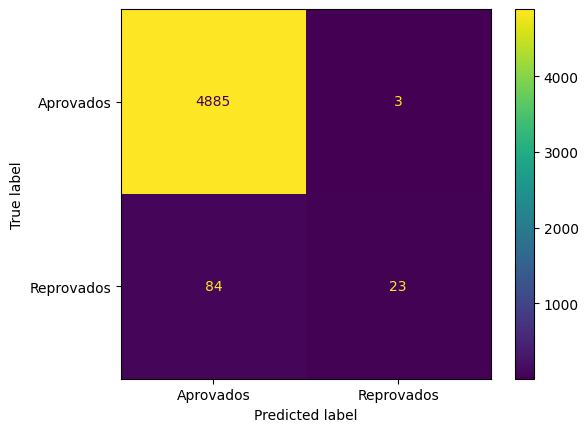

In [13]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels = ['Aprovados', 'Reprovados'])

In [18]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9825825825825826

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [21]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_test, y_test)

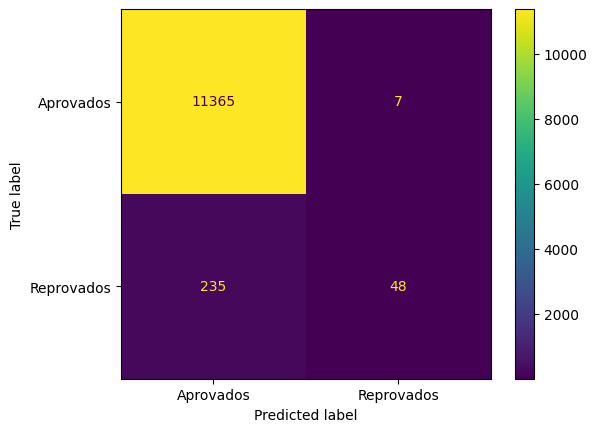

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = ['Aprovados', 'Reprovados'])

In [25]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9792363792363792

In [30]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf = clf.fit(X_train, y_train)

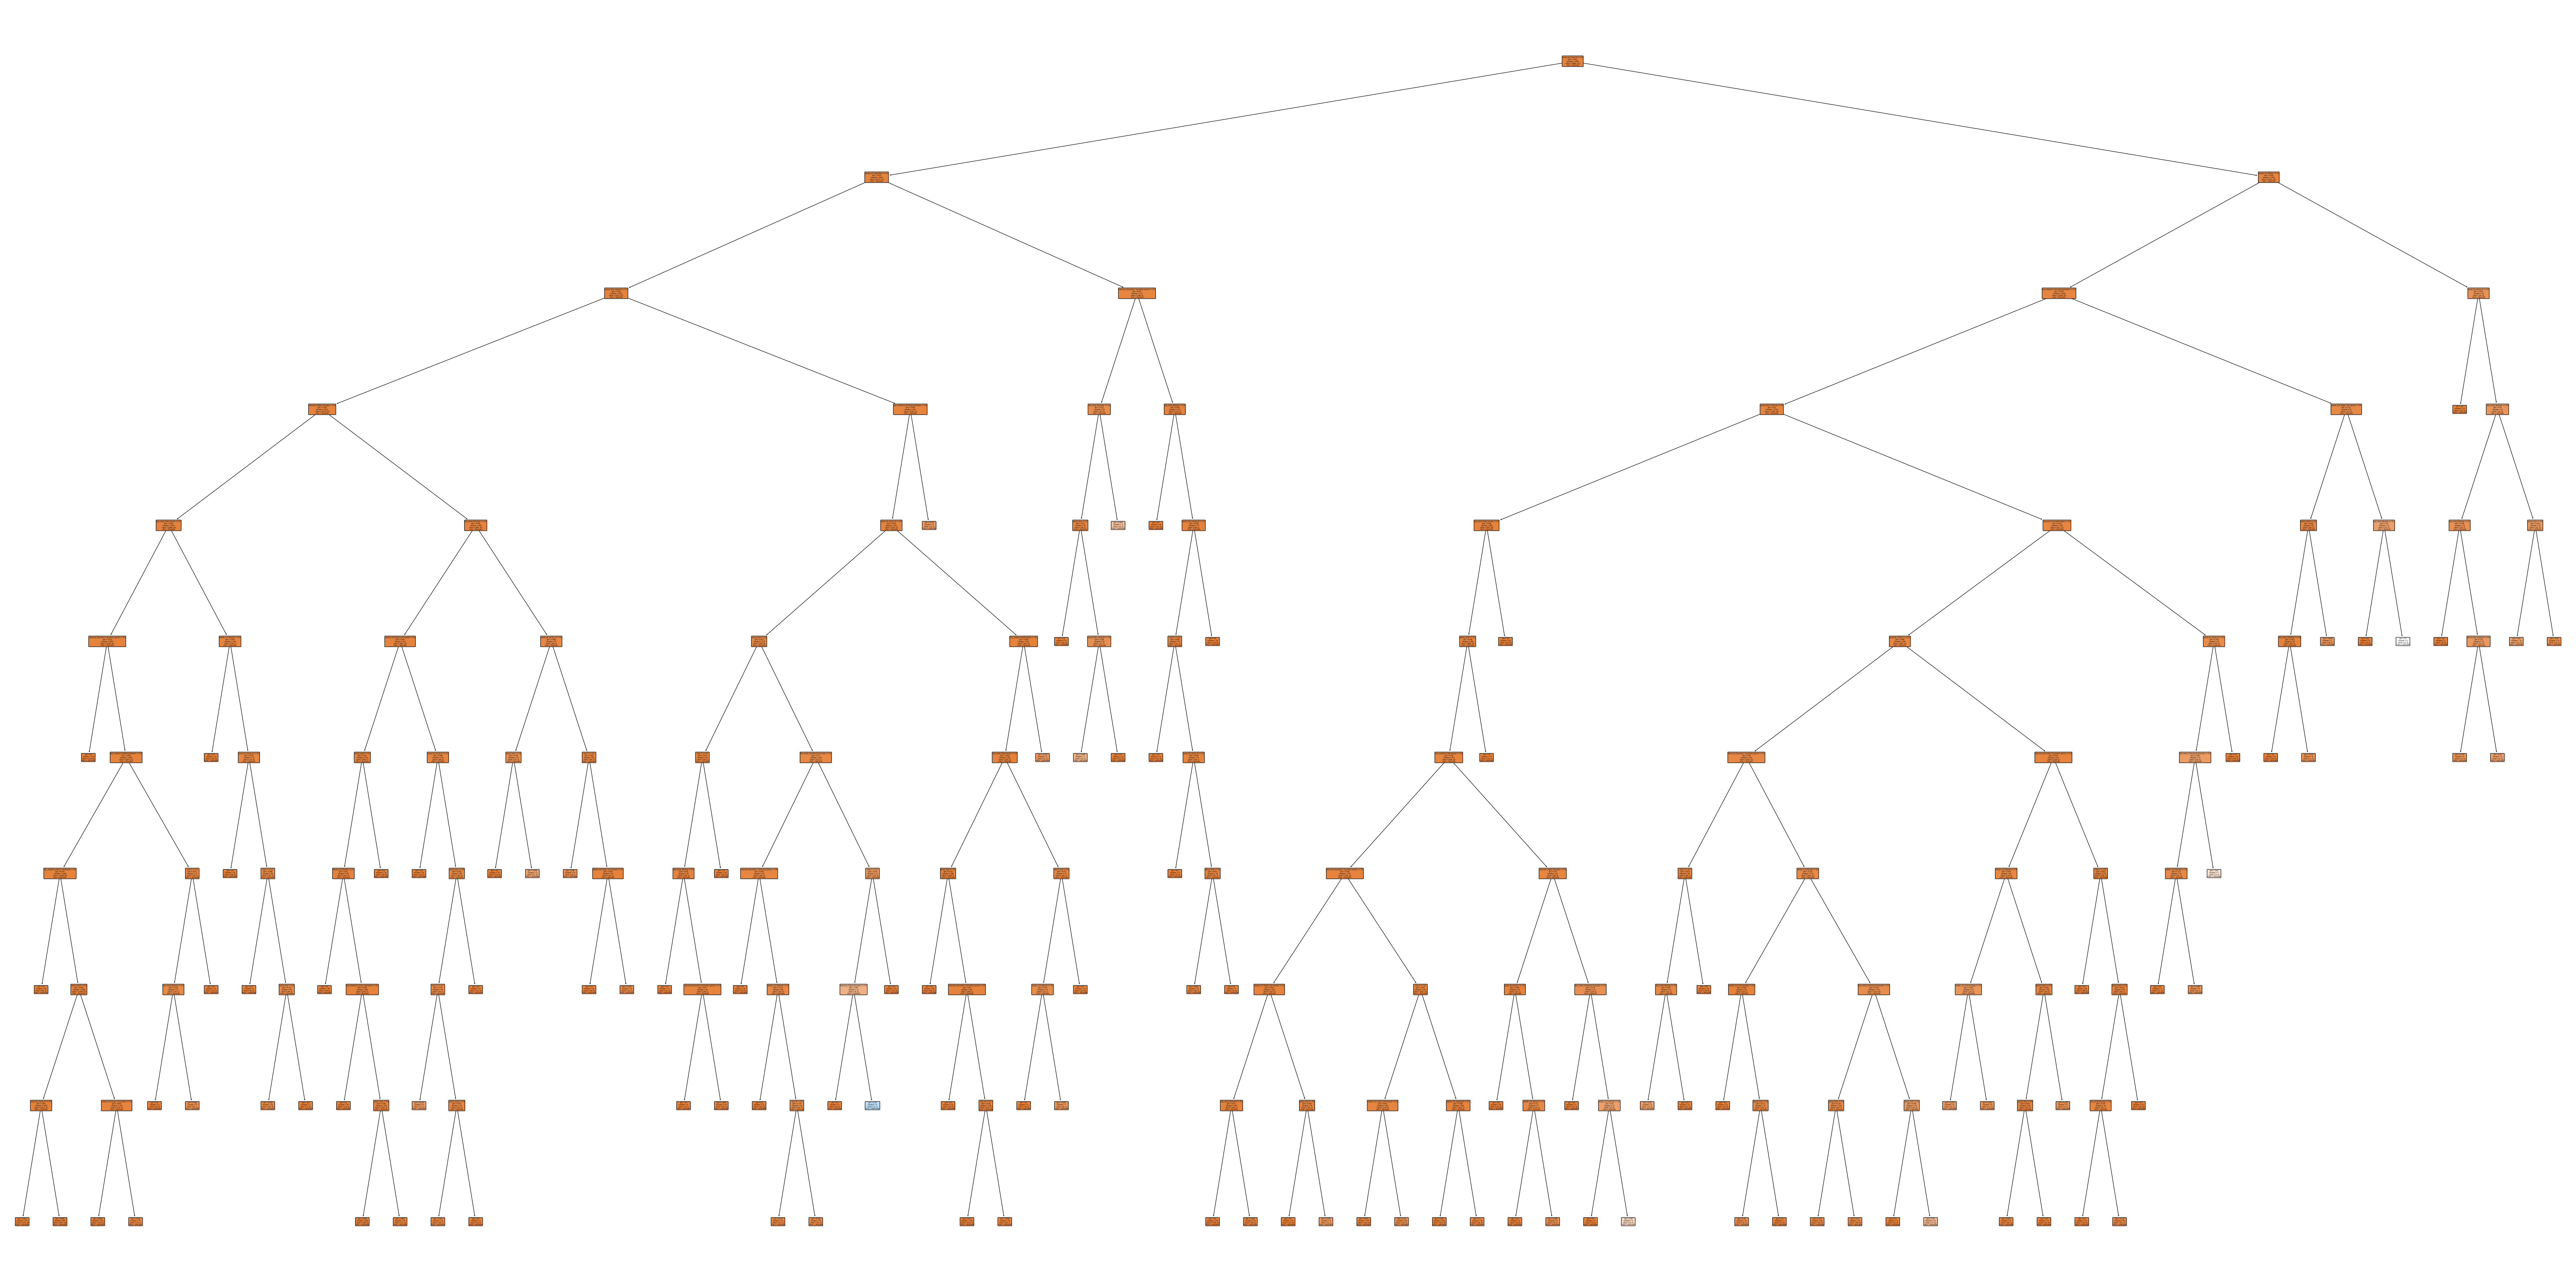

In [35]:
plt.figure(figsize = [100, 50])
plot_tree(clf,
          filled = True,
          rounded = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = X_train.columns);

In [36]:
proporcao_aprovados = (predict == 0).sum() /len(predict)
proporcao_reprovados = (predict == 1).sum() /len(predict)

In [37]:
proporcao_aprovados*100

99.52809952809952

In [38]:
proporcao_reprovados*100

0.4719004719004719

In [39]:
df['mau'] = df['mau'].replace(True, False)
df['mau'].value_counts()

,count
mau,
False,16650


In [40]:
y = df['mau']
x = df.drop('mau', axis = 1)

In [41]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf = clf.fit(X_train, y_train)

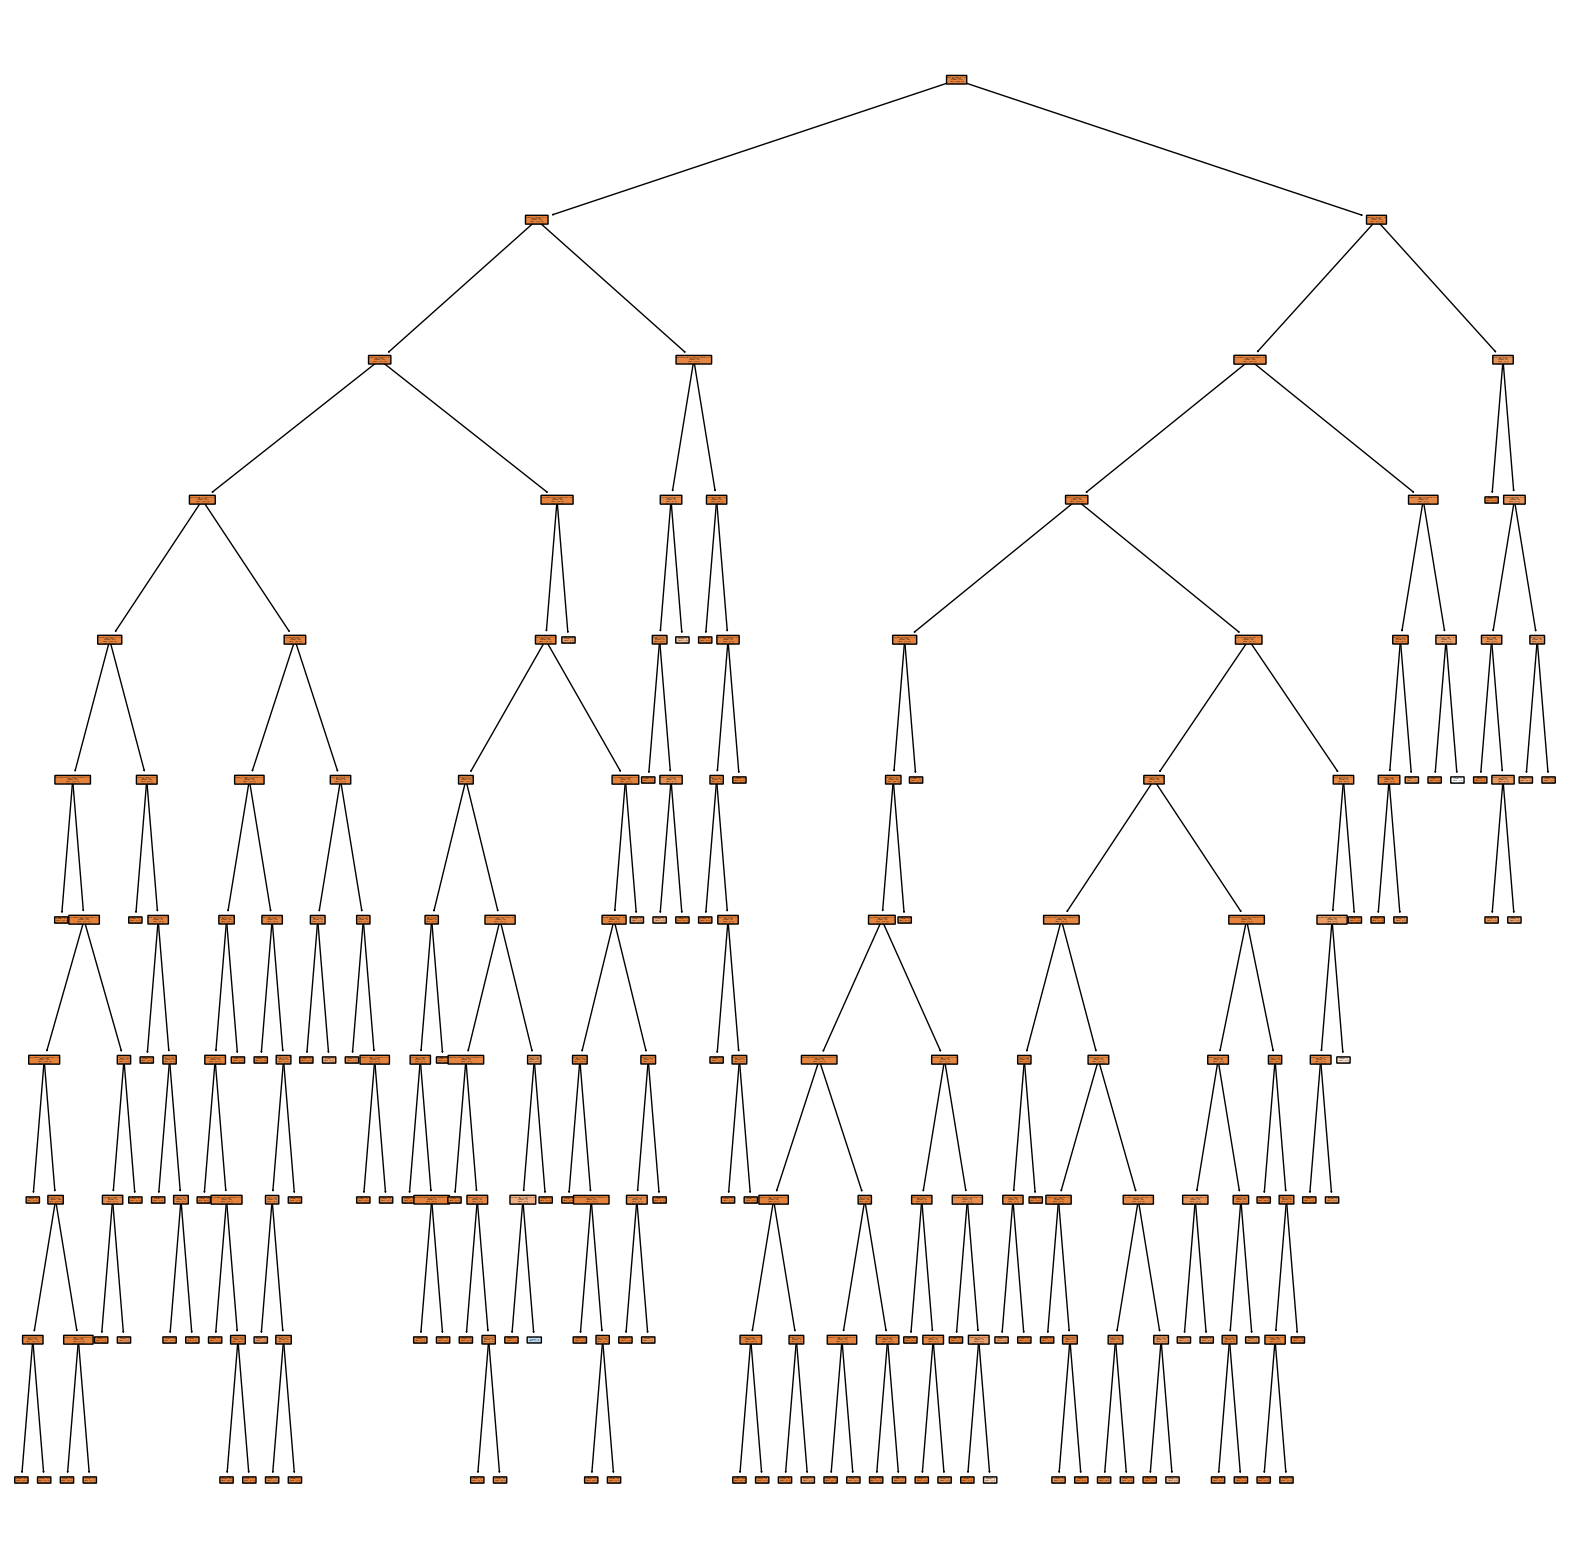

In [50]:
plt.figure(figsize = [20, 20])
plot_tree(clf,
          filled = True,
          rounded = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = X_train.columns);

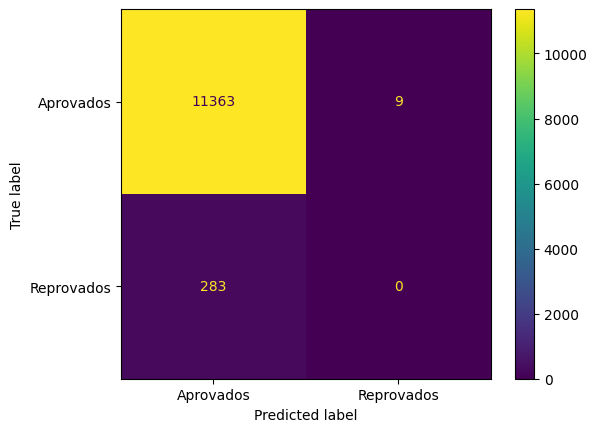

In [51]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = ['Aprovados', 'Reprovados'])

In [52]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9787787787787787

In [53]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9749463749463749

In [54]:
proporcao_aprovados = (predict == 0).sum() /len(predict)
proporcao_reprovados = (predict == 1).sum() /len(predict)

In [55]:
proporcao_aprovados

0.9992277992277993

In [56]:
proporcao_reprovados

0.0007722007722007722